# Задание

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Ход выполнения

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('./games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Описание данных**:
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Подготовка данных

### Замените названия столбцов (приведите к нижнему регистру)

In [233]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [234]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [235]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [236]:
df['year_of_release'] = df['year_of_release'].astype('Int32')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sum              16715 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.5+ MB


In [238]:
df.query('year_of_release > 2001')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [239]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [240]:
df.user_score.replace('tbd', np.nan, inplace=True)
df.user_score = df.user_score.astype(float)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sum              16715 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.5+ MB


### Обработайте пропуски при необходимости

* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [242]:
df['sum'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## EDA

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [243]:
y = df['year_of_release'].value_counts()
x = y.index

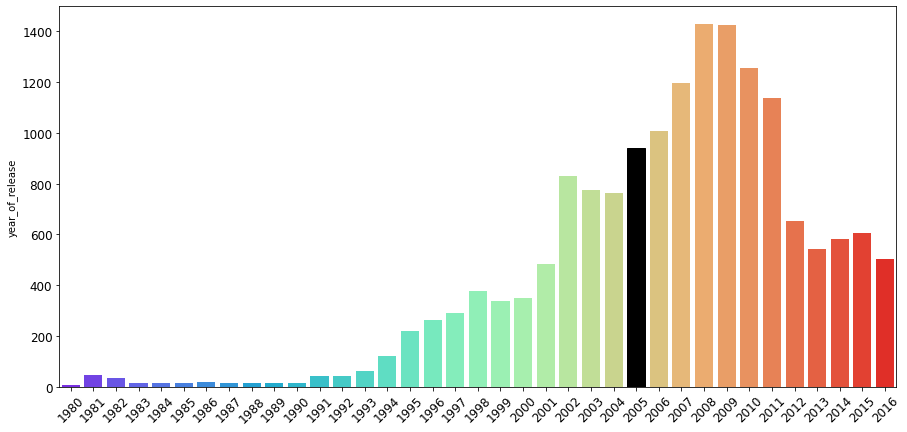

In [244]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y, palette='rainbow')
ax.containers[0].get_children()[25].set_color('k')
ax.tick_params('x', labelsize=12, labelrotation=45)
ax.tick_params('y', labelsize=12)

In [245]:
px.bar(x=x, y=y)

In [246]:
np.linspace(0.1, 0.5, len(y))

array([0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444,
       0.15555556, 0.16666667, 0.17777778, 0.18888889, 0.2       ,
       0.21111111, 0.22222222, 0.23333333, 0.24444444, 0.25555556,
       0.26666667, 0.27777778, 0.28888889, 0.3       , 0.31111111,
       0.32222222, 0.33333333, 0.34444444, 0.35555556, 0.36666667,
       0.37777778, 0.38888889, 0.4       , 0.41111111, 0.42222222,
       0.43333333, 0.44444444, 0.45555556, 0.46666667, 0.47777778,
       0.48888889, 0.5       ])

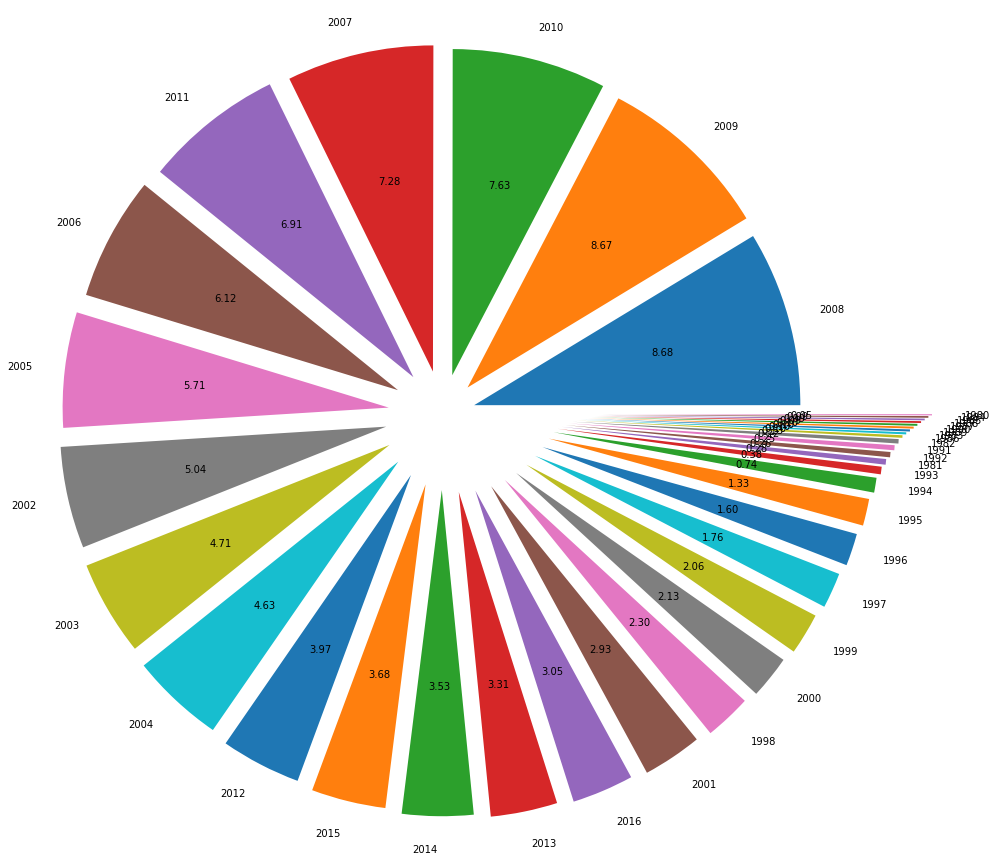

In [82]:
plt.figure(figsize=(15, 15))
plt.pie(y, explode=np.linspace(0.1, 0.5, len(y)), autopct='%.2f', labels=y.index)
plt.show()

### Посмотрите, как менялись продажи по платформам. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [247]:
platforms_sales_df = df.pivot_table(index=['platform', 'year_of_release'], values='sum', aggfunc='sum')
platforms_sales_df

sum
platform year_of_release       
2600     1980             11.38
         1981             35.68
         1982             28.88
         1983              5.84
         1984              0.27
...                         ...
XB       2008              0.18
XOne     2013             18.96
         2014             54.07
         2015             60.14
         2016             26.15

[238 rows x 1 columns]

In [248]:
platforms_sales_df

sum
platform year_of_release       
2600     1980             11.38
         1981             35.68
         1982             28.88
         1983              5.84
         1984              0.27
...                         ...
XB       2008              0.18
XOne     2013             18.96
         2014             54.07
         2015             60.14
         2016             26.15

[238 rows x 1 columns]

In [249]:
platforms_sales_df = platforms_sales_df.reset_index()
platforms_sales_df

,platform,year_of_release,sum
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


<AxesSubplot:xlabel='year_of_release'>

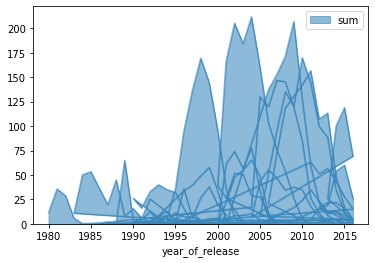

In [143]:
platforms_sales_df.plot.area(x='year_of_release', y='sum', stacked=False)

In [250]:
px.line(platforms_sales_df, x='year_of_release', y='sum', color='platform')

In [251]:
top_platforms = platforms_sales_df.pivot_table(index='platform', aggfunc='sum').sort_values(by='sum', ascending=False).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

In [252]:
df[(df['year_of_release'] == 2013) & (df['genre'] == 'Action') & (df['na_sales'] > 2.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86


In [253]:
selection_genre = 'Action'

In [254]:
df.query("year_of_release == 2013 and genre == @selection_genre and na_sales > 2.0")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86


### Возьмите данные за соответствующий актуальный период.

Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [261]:
year_lims = [2006, 2016]
actual_df = df.query('year_of_release >= @year_lims[0] and year_of_release <= @year_lims[1]')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [262]:
actual_platforms_sales_df = platforms_sales_df.query('year_of_release >= @year_lims[0] and year_of_release <= @year_lims[1]')
actual_platforms_sales_df

,platform,year_of_release,sum
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [263]:
px.line(actual_platforms_sales_df, x='year_of_release', y='sum', color='platform')

In [264]:
actual_platforms = ['PS4', 'XOne', '3DS', 'X360', 'WiiU', 'PS3']

In [265]:
actual_platforms_sales_df.query('platform in @actual_platforms', inplace=True)

<ipython-input-265-92336fc6277a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
len(actual_platforms_sales_df)

41

In [271]:
actual_platforms_sales_df

,platform,year_of_release,sum
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
17,3DS,2016,15.14
142,PS3,2006,20.96
143,PS3,2007,73.19
144,PS3,2008,118.52
145,PS3,2009,130.93


In [270]:
actual_platforms_sales_df.describe()

,year_of_release,sum
count,41.000000,41.000000
mean,2012.414634,65.799756
std,2.983082,48.980400
min,2006.000000,1.520000
25%,2011.000000,21.650000
50%,2013.000000,54.070000
75%,2015.000000,107.360000
max,2016.000000,170.030000


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:title={'center':'sum'}, xlabel='platform'>

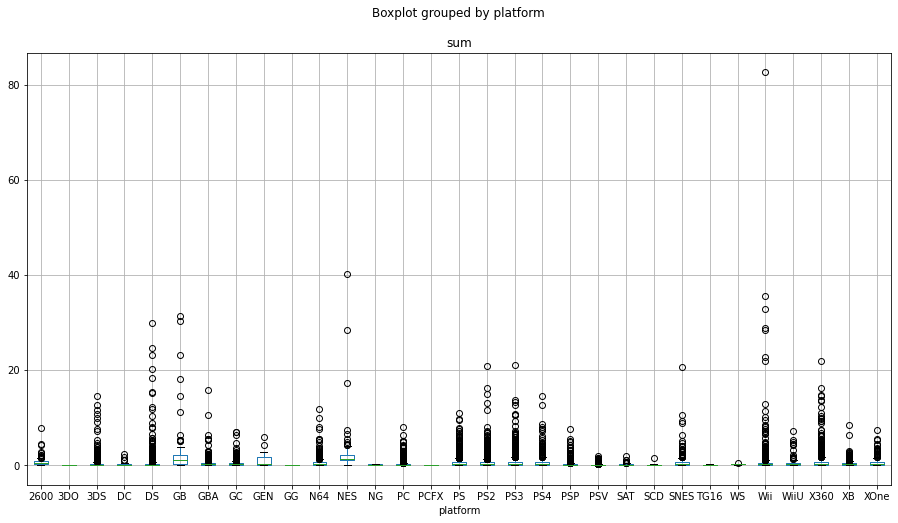

In [272]:
df.query('').boxplot(column=['sum'], by='platform', figsize=(15, 8))

In [231]:
actual_platforms_sales_df.describe()

,year_of_release,sum
count,47.000000,47.000000
mean,2009.595745,84.659362
std,3.932361,66.840098
min,2001.000000,0.180000
25%,2007.000000,19.960000
50%,2010.000000,75.990000
75%,2013.000000,139.660000
max,2016.000000,211.810000


In [232]:
px.box(actual_platforms_sales_df, x='platform', y='sum')

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

In [273]:
actual_df2 = actual_df.query('platform in @actual_platforms and year_of_release >= @year_lims[0] and year_of_release <= @year_lims[1]')
actual_df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [274]:
actual_df2.corr().loc[['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], ['critic_score', 'user_score']]

,critic_score,user_score
na_sales,0.375348,0.100226
eu_sales,0.366489,0.078597
jp_sales,0.154634,0.151312
other_sales,0.375325,0.091323


### Посмотрите на общее распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [275]:
actual_df2.pivot_table(index='genre', values='sum').sort_values(by='sum', ascending=False)

,sum
genre,
Shooter,1.398333
Platform,0.839756
Role-Playing,0.773989
Racing,0.741917
Sports,0.674494
Action,0.638326
Fighting,0.629891
Simulation,0.502358
Misc,0.480417


## Портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP)

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [206]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

### Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.